### G마켓 크롤링

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import nltk

### Top 200 _ 전체 품목

In [2]:
url_gm = 'http://corners.gmarket.co.kr/BestSellers'

res_gm = requests.get(url_gm)
soup_gm = BeautifulSoup(res_gm.content, 'html.parser')
data_gm = soup_gm.find_all('a', {'class':'itemname'})

print(url_gm)

http://corners.gmarket.co.kr/BestSellers


In [3]:
for item_gm in data_gm:
    print(item_gm.get_text())






(대감김치) 국내산 배추김치 5kg
[올젠]갤러리아  남성14종 셔츠 ZOZ2WC1309/1305/1315/1317/1324
제주 하우스 감귤 4.5kg(대과)/ 2개구매시 1kg추가증정
[네이처드림]리얼 타트체리주스 1000ml 2병/NFC/타트체리 100%
[차모아]자동차 도어커버 풀세트 단하루 오늘만 이가격
[한국투자증권](한국투자증권) 온라인 금융상품권 5만원권
[참도깨비]누들 마법 떡볶이 9인분/누들떡3봉+스프3/2세트 어묵탕
[참도깨비]족발 보쌈 순살족발 녹차순살족발 3봉 /2세트시 떡볶이
[케이투]남여공용 롱다운 FODIUM2 (포디엄2) KMW18573
[다샵]국산 일회용 마스크 화이트 100매
[모다아울렛]휴안청플러스 KF94 식약처인증 마스크 대형50매
[스파클]스파클생수 2L 30병 쿠폰가13140
착한낙지 매콤~칼칼  착한낙지 135g x 6팩+비법소스 6팩
[다우니]초고농축 다우니 섬유유연제 베리베리 1L 3개
[연세우유]연세 뼈를생각한 고칼슘두유검은콩/호두아몬드72팩
[롯데푸드]롯데햄 키스틱 25g x 100개
(현대백화점)[현대백화점][쁘띠엘린] 립프로그)NEW 아이스크림카트-한영버전 (24개월이상)/역할놀이/한영 동시학습 
보존료 없는 건자두 2kg 푸룬/건과일
[숨37](신세계강남점)[8MS]NEW 시크릿 에센스 45ml 기획
[청정원]청정원 프리미엄파스타소스3개 골라담기+면or수프증정
집구빵 갈릭크로와상 200g +200g(총20개입)
찌지않고 바로먹는 쑥개떡(1kg) + (1kg) 콩가루증정
여성팬티/노라인/위생/엉뽕/찐 초특가
감자 경상도 햇 감자 10kg(대)/찜용
[릴리유]릴리유 퓨어퍼플 물티슈 캡72매X10팩(1BOX)
[크리넥스]크리넥스 실크소프트 250매X3입X3팩 /곽티슈
[동원에프앤비]라이트스탠다드 85g x 22캔
eTV 옥주부 제주돼지통까스(등심 8팩+치즈 2팩+소스 2종(10팩)+돈가스거치대)
[플라스틱아일랜드스토리] 야상형 덕 다운 점퍼 (PK4NZ166)
[미스타셰프]미스타셰프 갈비탕 600g 

In [4]:
item_list_gm = []

for item_gm in data_gm:
    items_gm = item_gm.get_text()
    item_list_gm.append(items_gm)           

str_itemlist_gm = str(item_list_gm)

tokenized_gm = nltk.word_tokenize(str_itemlist_gm)

word_dic_gm = {}

for word in tokenized_gm:
    if word not in word_dic_gm:
        word_dic_gm[word] = 1 # changed from "0" to "1"
    else:
        word_dic_gm[word] += 1
        
sorted_word_dic_gm = sorted(word_dic_gm.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_gm[:50]:
    print("{0}({1})".format(word, count), end=" ")

'(366) ,(224) [(150) ](150) )(67) ((65) x(18) %(14) 마스크(14) 다우니(10) /(9) 50매(9) 국산(7) KF94(7) 국내산(6) 3개(6) 청정원(6) +(6) 대형(6) 1+1(6) 500ml(6) ``(5) 남여공용(5) 생리대(5) 블랙(5) 일회용(4) 섬유유연제(4) 1kg(4) 크리넥스(4) 밀레(4) 대용량(4) 파스퇴르(4) 3팩(4) 특가(4) 카드가능(4) 30롤(4) 에어(4) 맛있는(4) 제주삼다수(4) 신일(4) 1000ml(3) 100(3) 온라인(3) 케이투(3) 롱다운(3) 다샵(3) 화이트(3) 100매(3) 2L(3) 초고농축(3) 

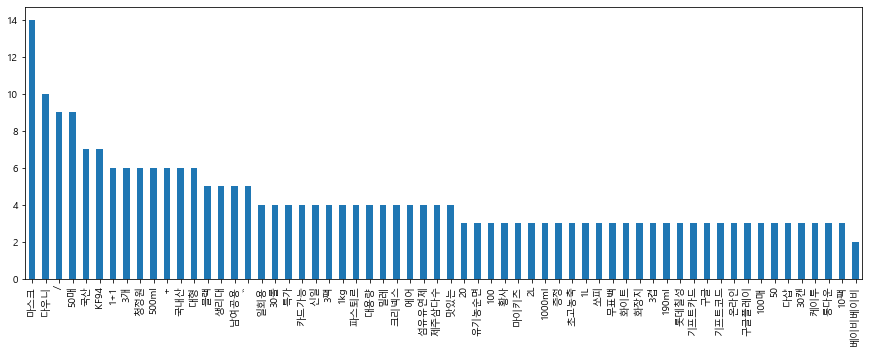

In [6]:
word_frequency_gm = nltk.FreqDist(word_dic_gm)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

gm_df = pd.DataFrame(list(word_frequency_gm.values()), word_frequency_gm.keys())
result_gm = gm_df.sort_values([0], ascending=False)
result_gm[8:70].plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

### 주방용품 Best100, 판매실적 기반 (자체)

In [7]:
url_gm_kit = 'http://corners.gmarket.co.kr/BestSellers?viewType=C&largeCategoryCode=100000085'

res_gm_kit = requests.get(url_gm_kit)
soup_gm_kit = BeautifulSoup(res_gm_kit.content, 'html.parser')
data_gm_kit = soup_gm_kit.find_all('a', {'class':'itemname'})

print(url_gm_kit)

http://corners.gmarket.co.kr/BestSellers?viewType=C&largeCategoryCode=100000085


In [8]:
for item_gm_kit in data_gm_kit:
    print(item_gm_kit.get_text())






[이놀]1+1 국내 실리콘 이유식 항균 도마
[테팔](현대백화점)테팔 쏘엘레강스 볶음팬 28cm/쏘 엘레강스/멀티팬
[테팔](현대백화점)테팔 하드티타늄 엑설런스 인덕션 프라이팬 28CM
바이올린6종채칼+감자칼/채칼/다지기/
[테팔]테팔 스페셜에디션 프라이팬 28cm
[테팔](현대백화점)테팔 쏘엘레강스 프라이팬 32cm/쏘 엘레강스
[가쯔]심플쿡 냉동밥전자렌지용기 20개
가위 집게 국자 뒤집개 원목소품까지 1+1 무료배송
로벤탈/키친아트 후라이팬 1+1+1 균일가
[키친플라워]키친플라워 냄새해결 매직홀 사각팬 (NY-3232)
램프쿡 만능 자동회전냄비
위스키 굿 실리콘 왕얼음틀4구 외 상시특가 50종
[카르닉]1+1 이중진공 스텐 텀블러 600ml 900ml/보온보냉병
[토프]확장형 씽크인주방선반/후라이팬정리대/접시정리대 외
[르크루제]갤러리아   르크루제  카술레 서빙볼
[리빙코디]쉐프 스마트 후라이팬 1+1 궁중팬 프라이팬 웍
[키친아트]큐티 와플 스낵 메이커/ PK-2368JT
스마트큐브 얼음트레이 풀세트 컨테이너 전용스쿱 포함
[키친아트]프라이팬 1+1 내맘대로 골라담기 2P
[엠에스리빙]접시정리대/후라이팬정리대/주방수납용품 44종
[LG생활건강]세균아꼼짝마 ABY 손소독티슈 50매 6팩
[락앤락]바로한끼 밥용기/바로보관유리용기
[락앤락]비스프리 스테커블 3개 반찬통 밀폐용기 냉장고정리
[스카트]스카트 THE 버블 수세미 브라운 50매X3롤
[스카트]스카트 THE 버블 수세미 그레이 50매X3롤
2020년 출시 최신상 락앤락 스마트 진공쌀통
[브리타][브리타] 막스트라 플러스 필터 3개월분 + 1개월분 (총 4개월분)
[니트렉스]라텍스장갑니트릴장갑200매/요리/위생
[테팔](현대백화점)테팔 하드티타늄 엑설런스 인덕션 프라이팬 24CM
[엠에스리빙]투썸 스텐레스 물빠짐 식기건조대 국내제작/304물받이
[러브쿡]스타일 플레이트 파스타볼 2p / 파스타접시 스텐접시
[해피콜]1+1 컴포트 다이아몬드 후라이팬 28cm + 궁중팬 28cm
[LG생활건강]

In [9]:
item_list_gm_kit = []

for item_gm_kit in data_gm_kit:
    items_gm_kit = item_gm_kit.get_text()
    item_list_gm_kit.append(items_gm_kit)           

str_itemlist_gm_kit = str(item_list_gm_kit)

tokenized_gm_kit = nltk.word_tokenize(str_itemlist_gm_kit)

word_dic_gm_kit = {}

for word in tokenized_gm_kit:
    if word not in word_dic_gm_kit:
        word_dic_gm_kit[word] = 1 # changed from "0" to "1"
    else:
        word_dic_gm_kit[word] += 1
        
sorted_word_dic_gm_kit = sorted(word_dic_gm_kit.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_gm_kit[:50]:
    print("{0}({1})".format(word, count), end=" ")

'(170) ,(104) [(72) ](72) ((24) )(24) 테팔(14) 1+1(11) 프라이팬(9) 후라이팬(9) 락앤락(9) 인덕션(7) 28cm(6) 스카트(6) 해피콜(6) ``(5) 궁중팬(5) 키친아트(5) 현대백화점(4) 스마트(4) 풀세트(4) LG생활건강(4) 세균아꼼짝마(4) ABY(4) 손소독티슈(4) 3개(4) 수세미(4) 브리타(4) +(4) 식기건조대(4) 세트(4) 지퍼락(4) 하드티타늄(3) 엑설런스(3) 스텐(3) THE(3) 버블(3) 50매X3롤(3) 진공쌀통(3) 컴포트(3) 프리미엄(3) 글라스락(3) 지퍼백(3) IH(3) 실리콘(2) 이유식(2) 쏘엘레강스(2) 무료배송(2) 균일가(2) 키친플라워(2) 

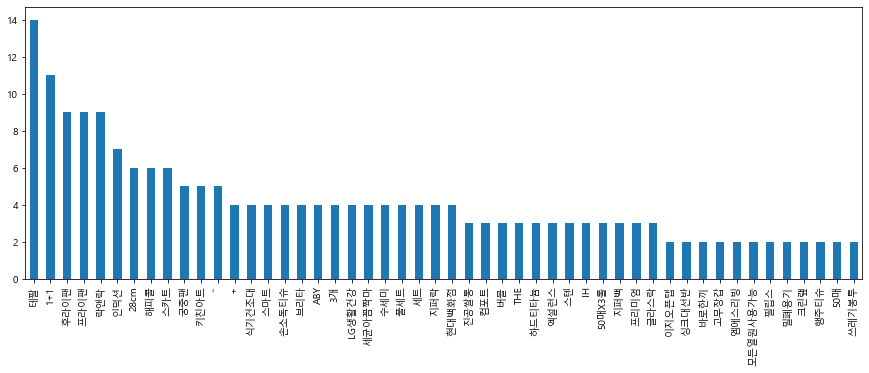

In [10]:
word_frequency_gm_kit = nltk.FreqDist(word_dic_gm_kit)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

gm_kit_df = pd.DataFrame(list(word_frequency_gm_kit.values()), word_frequency_gm_kit.keys())
result_gm_kit = gm_kit_df.sort_values([0], ascending=False)
result_gm_kit[6:56].plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

### Top 100 _ 생활 / 주방 / 건강 (주방용품 상위 카테고리)

In [11]:
url_gm_life = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G08'

res_gm_life = requests.get(url_gm_life)
soup_gm_life = BeautifulSoup(res_gm_life.content, 'html.parser')
data_gm_life = soup_gm_life.find_all('a', {'class':'itemname'})

print(url_gm_life)

http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G08


In [12]:
for item_gm_life in data_gm_life:
    print(item_gm_life.get_text())






퓨어커버 국내산 KF94 4중 마스크 대형 방역 황사 50매
비비 국산 KF94 황사 미세먼지 마스크 대형 50매
블랑슈 시그니처 블랙 아기물티슈 캡형 100매 10팩
[다우니]초고농축 다우니 섬유유연제 엑스퍼트 실내건조 1L 3개
[다샵]국산 일회용 마스크 화이트 100매
[닥터펩스토리] KF94 마스크 (50매) 
kf94 마스크 블랙 대형 합리적인 비말차단 국내산 40매
[다우니]초고농축 다우니 섬유유연제 베리베리 1L 3개
[페리오]펌핑치약 285gX3종(스피아민트+허브+시트러스)
KF94 4중필터 마스크 50매 개당758원/순차발송랜덤발송
센스물티슈 악어 캡형 100매 10팩+10팩 /한장씩톡톡
[크리넥스]크리넥스 실크소프트 250매X3입X3팩 /곽티슈
[깨끗한나라]순수브라운 3겹 화장지 27m 30롤 2팩 (특가)
[릴리안](골라담기)순수한면 ZERO 생리대 x 3+3팩
폴라리스 국산 어린이용 3중 필터 일회용 마스크 50매
[시크릿데이](2+2팩) 베스트셀러 러브생리대/오버나이트/라이너
[스웰데이]욕실주방 곰팡이제거제 젤타입 250ml 1+1
[미마마스크]SNS 입소문 (100% 국내 생산 무중력 마스크) 미마 보건용 KF94 마스크 화이트 50매
KF94 황사 마스크 대형 국산 개별 포장 블랙 50매
kf80 소형 코끼리패턴 어린이 마스크 40매 비말차단
[다우니]초고농축 다우니 섬유유연제 화이트티 1L 3개
[릴리유]릴리유 퓨어퍼플 물티슈 캡72매X10팩(1BOX)
[인가드]인가드 국산 KF94 황사 미세먼지 마스크 대형 80매
국산 식약처인증 KF-AD 입체형 비말차단 마스크 50매
국산 KF-AD 비말차단 일회용 덴탈마스크 대형 100매
[테리파머]호텔수건 무형광 180g 다이아보더 수건 10장 타올
[아이러브베베]아이러브베베물티슈핑크100매캡형X20팩
[다우니]다우니 대용량 섬유유연제 아로마플로럴 8.5L 2개 농축
MS 치실 600p/치간칫솔/유아용치실/혀클리너/국산
NEW땡큐 화장지 (30롤 x 2팩) / 3겹 두루마리 휴지


In [13]:
item_list_gm_life = []

for item_gm_life in data_gm_life:
    items_gm_life = item_gm_life.get_text()
    item_list_gm_life.append(items_gm_life)           

str_itemlist_gm_life = str(item_list_gm_life)

tokenized_gm_life = nltk.word_tokenize(str_itemlist_gm_life)

word_dic_gm_life = {}

for word in tokenized_gm_life:
    if word not in word_dic_gm_life:
        word_dic_gm_life[word] = 1 
    else:
        word_dic_gm_life[word] += 1
        
sorted_word_dic_gm_life = sorted(word_dic_gm_life.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_gm_life[:50]:
    print("{0}({1})".format(word, count), end=" ")

'(170) ,(104) [(71) ](71) ((24) )(24) 마스크(23) 50매(16) 다우니(15) 대형(10) KF94(8) 아기물티슈(8) 100매(8) 황사(7) 국산(7) 1L(7) 비말차단(7) 30롤(7) 캡형(6) 3개(6) 일회용(6) 크리넥스(6) 3겹(6) x(6) ``(5) 미세먼지(5) 섬유유연제(5) 화장지(5) 칫솔(5) 잘풀리는집(5) 프리미엄(5) 블랙(4) 10팩(4) 초고농축(4) 페리오(4) 릴리유(4) KF-AD(4) 대용량(4) X(4) 20팩(4) 테팔(4) 국내산(3) 시그니처(3) 엑스퍼트(3) 다샵(3) 화이트(3) 'KF94(3) 27m(3) 생리대(3) 3중(3) 

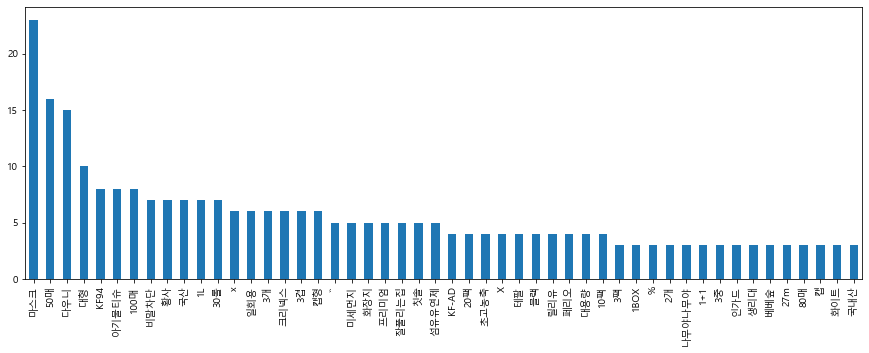

In [14]:
word_frequency_gm_life = nltk.FreqDist(word_dic_gm_life)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

gm_life_df = pd.DataFrame(list(word_frequency_gm_life.values()), word_frequency_gm_life.keys())
result_gm_life = gm_life_df.sort_values([0], ascending=False)
result_gm_life[6:56].plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

In [15]:
url_gm_fur = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G09'

res_gm_fur = requests.get(url_gm_fur)
soup_gm_fur = BeautifulSoup(res_gm_fur.content, 'html.parser')
data_gm_fur = soup_gm_fur.find_all('a', {'class':'itemname'})

print(url_gm_fur)

http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G09


In [16]:
for item_gm_fur in data_gm_fur:
    print(item_gm_fur.get_text())






[르헤브]1+1 시원한 메밀베개/편백베개/여름 베개/아동베개
[에이블루]커블체어 와이더 20년형 자세교정의자 출시
[이노하우스]슈퍼특가 액자형 DIY 보석십자수 세트 유화 그림 명화
[나크제이]1+1 디퓨저 500ml + 500ml + 스틱세트/탈취제/방향제
[르헤브]꿉꿉함 제로 시원한 여름 쇼파패드/사계절 쇼파패드
국산 순면 두툼한 누빔 매트리스커버/침대/매트/커버
[쁘리엘르]3중직 벽걸이 스탠드 에어컨커버/선풍기커버
[아이르]아이르 먼지없는 나노화이바 차렵 이불단품
[4종세트] 박나래 기절베개 속통1.1kgx4개+커버4/그레이
[한샘]루미에 원형 테이블 라탄 (5종/택1) 사각 거실테이블
지금부터 쭉 항균 차렵이불 토퍼 침구 풀세트 (퀸)
[리바트온라인]리바트온라인 꼼므 1200 아이책상 + 유아의자
[비트백]액자형 DIY 보석십자수 명화그리기/비즈/그림/큐빅
[에이블루]커블체어_와이더/컴피 바른자세 허리 교정의자 모음
[쁘리엘르]삼각등쿠션 바디필로우 인테리어 쿠션 커버 솜포함
[쉬즈홈]부드럽고 폭신한 자카드 발매트 1+1
일루션 암막커튼 최대 1+1 (2장) 베스트셀러전
[쉬즈홈]쾌적하고 산뜻한 시어서커 여름 베개커버 1+1
[기타브랜드] [무료배송]커블 체어 와이더 자세교정 의자
[듀오백]DK 043W 회의실의자 독서실의자 공부의자 본사직영
[에이블루]NEW 커블체어 컴피 바른자세 교정의자 등쿠션
[퍼스퍼코리아]무료반품 랭킹1위 컴퓨터 학생 사무용 공부 책상의자
항균 매트리스커버 누빔 순면 방수 매트커버 침대커버
[아이리스코리아]3단 칼라 웨이브 공간박스 수납장 KSB-3S
[리바트온라인]마카롱 1200 슬라이딩 책장 전면형
(특가)국산튼튼한 조립식 렌지대 다이 전자렌지수납장
[아이르]국내산 매트리스커버 /침대커버/누빔패드/모달/순면
[쁘리엘르]1+1 피그먼트 베개커버/순면 베개커버/방수베개커버
[미라벨]미라벨 발편한 주방매트 싱글형
[아트홀릭]액자형 DIY 보석십자수 액자 비즈 유화 명화그리기
1~6인 키높이 접이식테이블 좌식책상 밥상 이반가

In [17]:
item_list_gm_fur = []

for item_gm_fur in data_gm_fur:
    items_gm_fur = item_gm_fur.get_text()
    item_list_gm_fur.append(items_gm_fur)           

str_itemlist_gm_fur = str(item_list_gm_fur)

tokenized_gm_fur = nltk.word_tokenize(str_itemlist_gm_fur)

word_dic_gm_fur = {}

for word in tokenized_gm_fur:
    if word not in word_dic_gm_fur:
        word_dic_gm_fur[word] = 1 
    else:
        word_dic_gm_fur[word] += 1
        
sorted_word_dic_gm_fur = sorted(word_dic_gm_fur.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_gm_fur[:50]:
    print("{0}({1})".format(word, count), end=" ")

'(166) ,(104) [(63) ](63) ((20) )(19) 1+1(12) 보석십자수(7) 여름(7) 액자형(6) ``(5) 유화(5) 순면(5) 누빔(5) 쁘리엘르(5) 시원한(4) 에이블루(4) DIY(4) 그림(4) 아이르(4) 퀸(4) 국내산(4) 비즈(4) 명화그리기(4) 커블체어(3) 세트(3) +(3) 3중직(3) 스탠드(3) 먼지없는(3) 테이블(3) 토퍼(3) 리바트온라인(3) 1200(3) 암막커튼(3) 2장(3) 시어서커(3) 컴퓨터(3) 학생(3) '항균(3) 침대커버(3) 'DIY(3) %(3) 책상(3) 르헤브(2) 와이더(2) 이노하우스(2) 디퓨저(2) 500ml(2) '국산(2) 

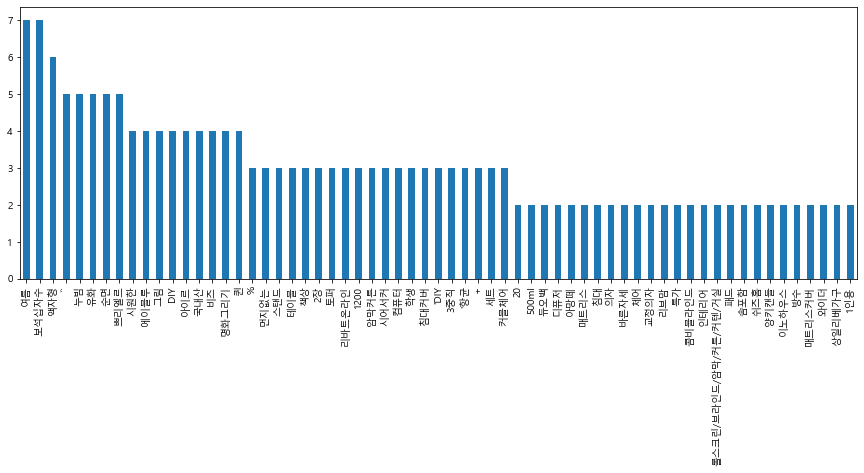

In [18]:
word_frequency_gm_fur = nltk.FreqDist(word_dic_gm_fur)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

gm_fur_df = pd.DataFrame(list(word_frequency_gm_fur.values()), word_frequency_gm_fur.keys())
result_gm_fur = gm_fur_df.sort_values([0], ascending=False)
result_gm_fur[7:70].plot(kind='bar', legend=False, figsize=(15,5))
plt.show()